In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
batch_size = 128
img_height = 256
img_width = 256

In [3]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset_new/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'dataset_new/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [4]:
class_names = training_ds.class_names

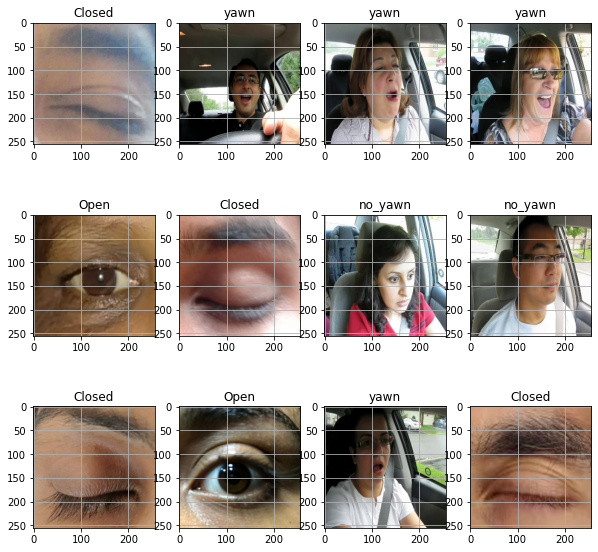

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [6]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
## lets define our CNN
classes = 4
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(pool_size = (2,2)),
  layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(128,(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(classes, activation= 'softmax')
])


In [11]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 10)

Epoch 1/10
20/20 [==============================] - 86s 4s/step - loss: 1.2834 - accuracy: 0.4406 - val_loss: 0.7154 - val_accuracy: 0.7621
Epoch 2/10
20/20 [==============================] - 86s 4s/step - loss: 0.5552 - accuracy: 0.7365 - val_loss: 0.4746 - val_accuracy: 0.7991
Epoch 3/10
20/20 [==============================] - 87s 4s/step - loss: 0.3679 - accuracy: 0.8204 - val_loss: 0.3476 - val_accuracy: 0.8337
Epoch 4/10
20/20 [==============================] - 88s 4s/step - loss: 0.2737 - accuracy: 0.8833 - val_loss: 0.3462 - val_accuracy: 0.8360
Epoch 5/10
20/20 [==============================] - 87s 4s/step - loss: 0.1960 - accuracy: 0.9193 - val_loss: 0.3487 - val_accuracy: 0.8591
Epoch 6/10
20/20 [==============================] - 88s 4s/step - loss: 0.1724 - accuracy: 0.9266 - val_loss: 0.2452 - val_accuracy: 0.9007
Epoch 7/10
20/20 [==============================] - 88s 4s/step - loss: 0.1327 - accuracy: 0.9505 - val_loss: 0.2316 - val_accuracy: 0.9215
Epoch 8/10
20/20 [==

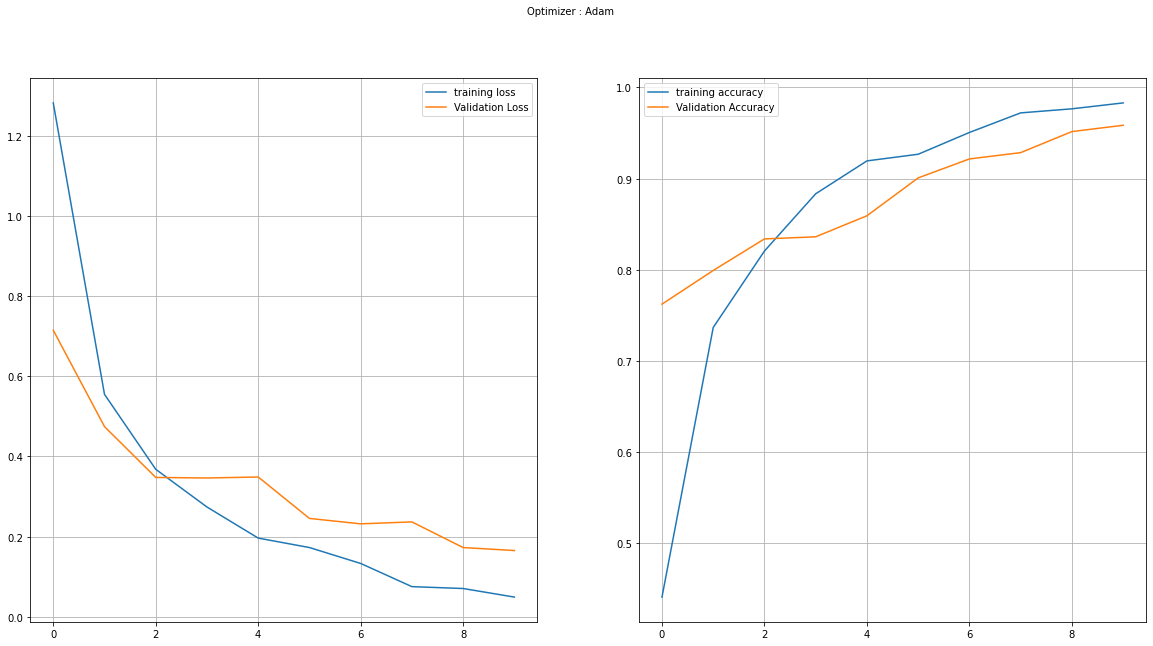

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.plot(retVal.history['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# saving model
MyCnn.save('drowsiness-stage1.h5')

In [ ]:
#########################################
# improving our model                   #
#########################################


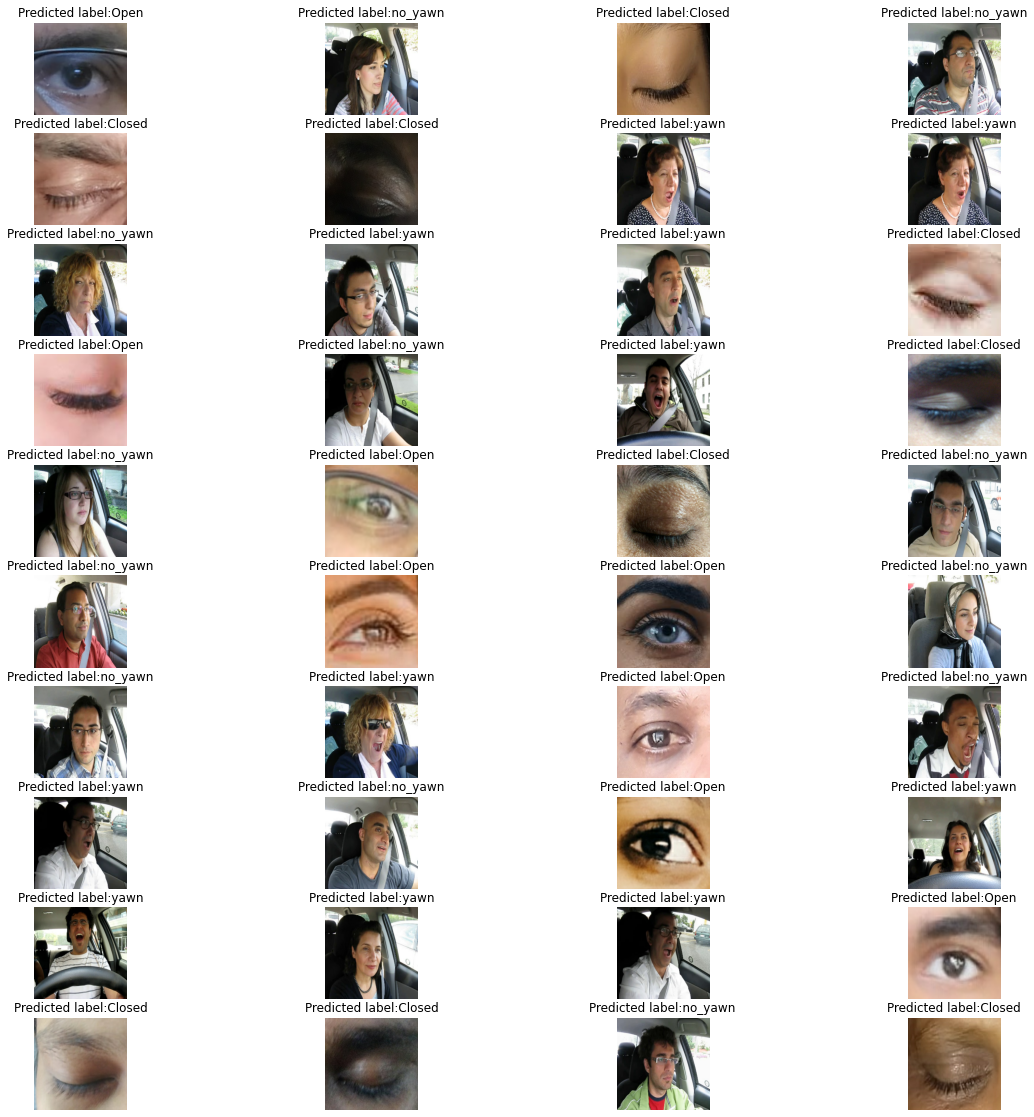

In [15]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)